In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sal=pd.read_csv("Salary_Data.csv")
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [3]:
sal.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
sal.shape

(30, 2)

In [11]:
from scipy.stats import zscore
z=abs(zscore(sal))
sal_mod=sal.loc[(z<3).all(axis=1)]
sal_mod.shape
sal_mod.columns

Index(['YearsExperience', 'Salary'], dtype='object')

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

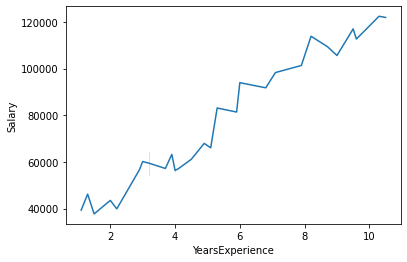

In [13]:
sns.lineplot(x="YearsExperience", y="Salary", data=sal_mod)

In [14]:
sal_mod.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [20]:
X=pd.DataFrame(sal_mod["YearsExperience"])
y=sal_mod["Salary"]

In [28]:
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score
from sklearn.linear_model import LinearRegression
max_r2_score=0
for r in range (42, 200):
    X_train,X_test,y_train,y_test=split(X,y,random_state=r,test_size=.2)
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    r2_sc=r2_score(y_test,y_pred)
    if r2_sc>max_r2_score:
        max_r2_score=r2_sc
        final_r=r
print ("with random_sate:",r,"max_r2_score:",r2_sc)

with random_sate: 199 max_r2_score: 0.9043638161837544


In [26]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr,X,y,cv=5,scoring="r2").mean()

-0.053364276845097036

In [31]:
X_train,X_test,y_train,y_test=split(X,y,random_state=199,test_size=.2)
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
r2_score(y_test,y_pred)

0.9043638161837544

In [32]:
np.sqrt(mean_squared_error(y_test,y_pred))

6116.213322460026

In [35]:
from sklearn.externals import joblib
joblib.dump(lr,"SalaryPrediction.pkl")

['SalaryPrediction.pkl']